In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('bank-full.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [2]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<ul>
<li><span style="color: #ffff99;">using labelencoder to convert object values to numeric values</span></li>
</ul>

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'month', 'contact', 'poutcome', 'housing', 'loan', 'Target', 'default']
for column_to_encode in columns_to_encode:
    encoder.fit(np.array(df[column_to_encode]))
    df[column_to_encode]=encoder.transform(df[column_to_encode])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


* eliminating the rows which have unknown value

In [5]:
columns_have_unknown=['job', 'marital', 'education', 'default', 'housing', 'loan']
for column_has_unknown in columns_have_unknown:
    df.drop(df[df[column_has_unknown] == 'unknown'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


** dataset dividing **

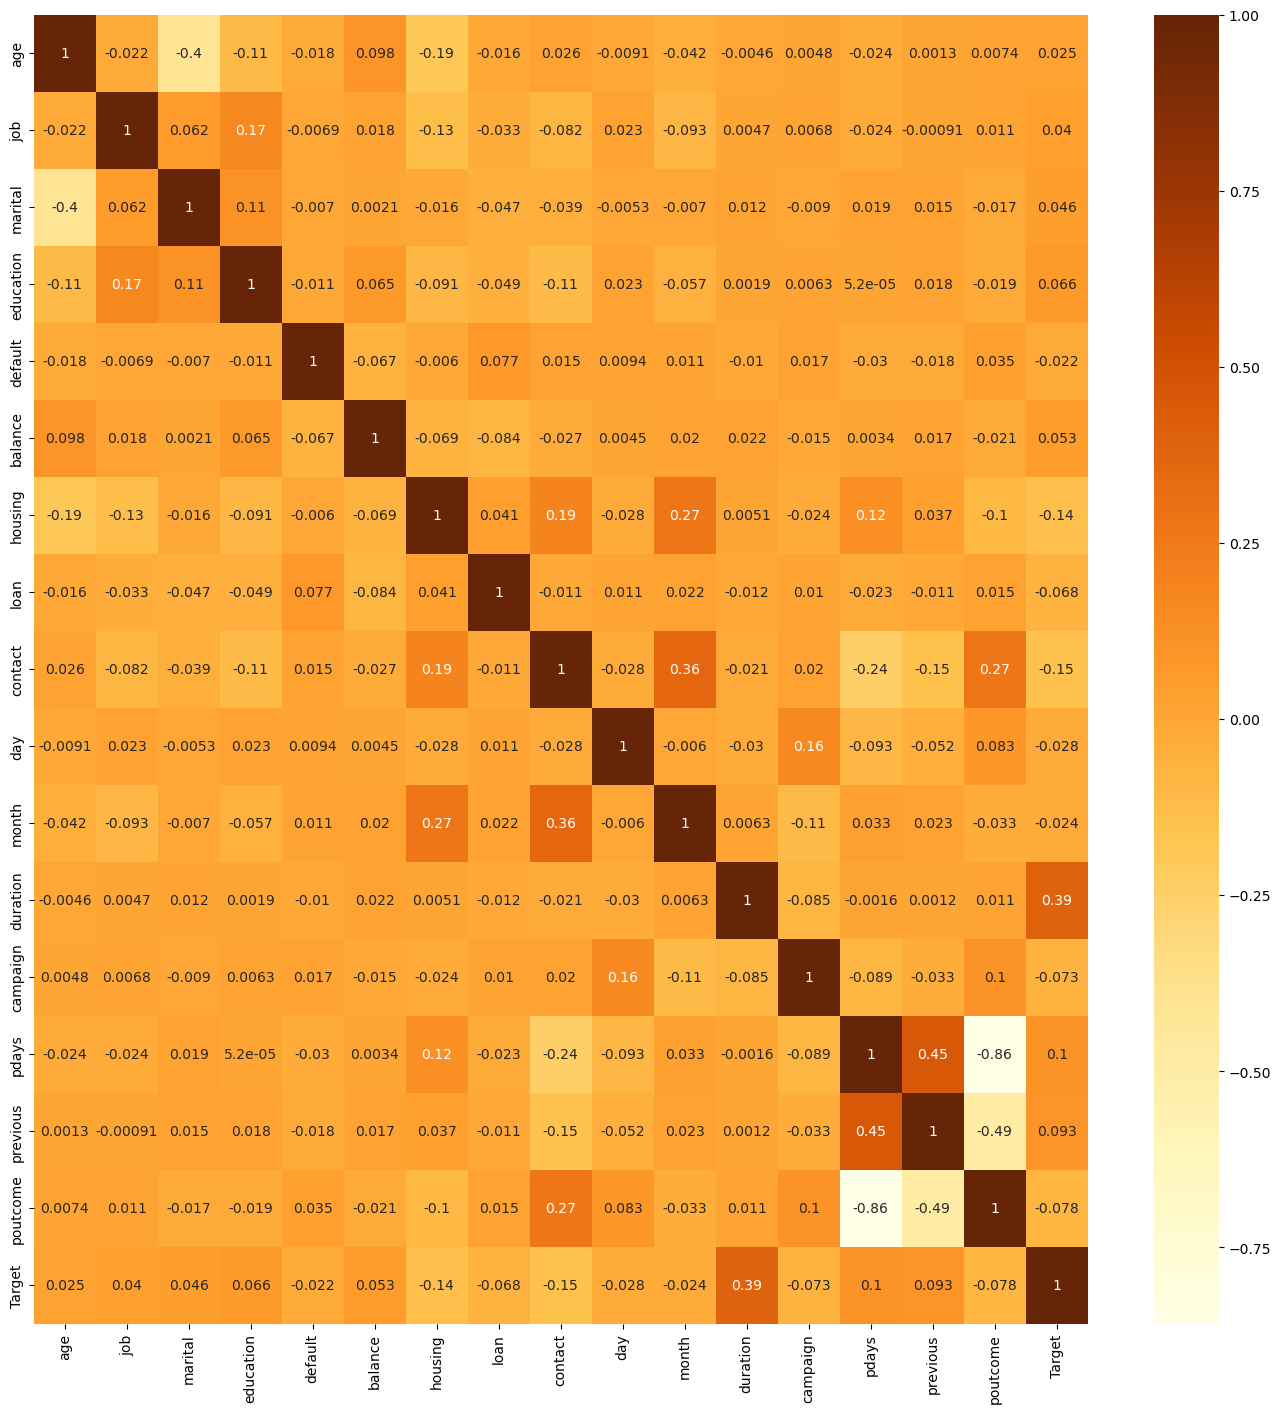

In [6]:
y = df["Target"].copy()
x = df.drop("Target", axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True, cmap="YlOrBr")
plt.show()

<ul>
<li>
<h1>ensemble learning</h1>
<ul>
<li><strong>Majority voting {Logistic Regression,Decision Tree&nbsp; classifier,Support Vector Machine}</strong></li>
</ul>
</li>
</ul>

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

<ul>
<li>
<h4><span style="color: #ffff00;">using logistic regression and svm and decision tree as base learners</span></h4>
</li>
</ul> 

In [8]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000, random_state = 42) #solver:Algorithm to use in the optimization problem
dt_clf = DecisionTreeClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)
hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)])  #Soft Voting/Majority Rule classifier for unfitted estimators.

In [9]:
from sklearn.metrics import accuracy_score
results = {}
for clf in (dt_clf, svm_clf, log_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    results[clf.__class__.__name__] = accuracy_score(y_test, y_pred)
results

{'DecisionTreeClassifier': 0.8766085790884719,
 'SVC': 0.8828418230563003,
 'LogisticRegression': 0.8904155495978552}

<ul>
<li>
<h3><span style="color: #ffff00;">using hard_voting_clf we may reach the better accuracy</span></h3>
</li>
</ul>

In [10]:
 
hard_voting_clf.fit(x_train, y_train)
y_pred = hard_voting_clf.predict(x_test)
results["HardVotingClassifier"] = accuracy_score(y_test, y_pred)
results

{'DecisionTreeClassifier': 0.8766085790884719,
 'SVC': 0.8828418230563003,
 'LogisticRegression': 0.8904155495978552,
 'HardVotingClassifier': 0.8906836461126005}

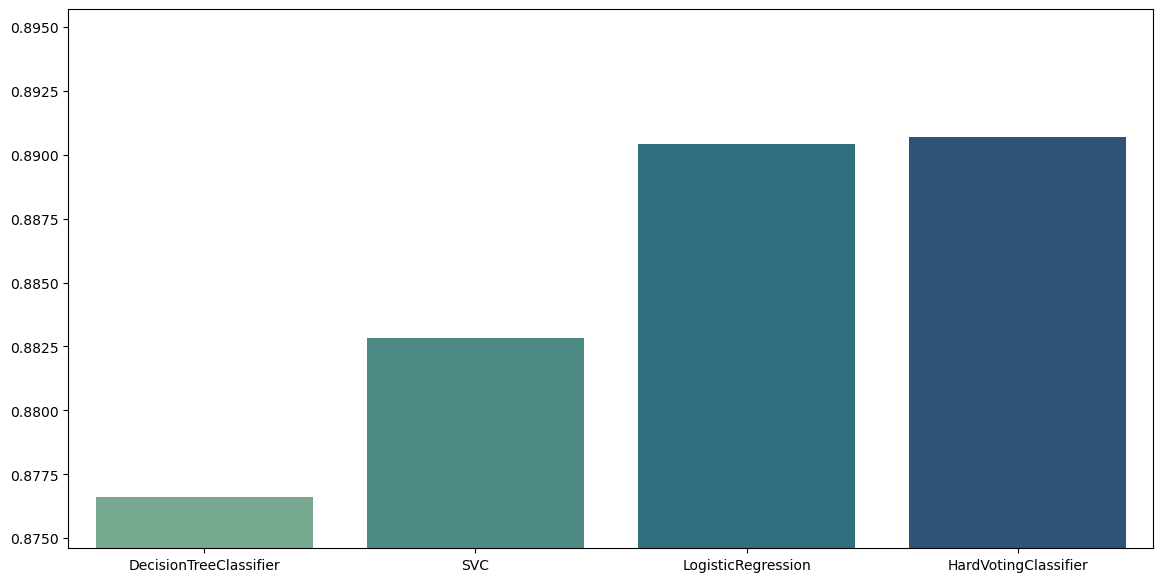

In [11]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest") #palette:Colors to use for the different levels of the hue variable???
ax.set_ylim([min(list(results.values()))-0.002, max(list(results.values()))+0.005]) #Set the y-axis view limits.
plt.show()

<ul>
<li>
<h3><span style="color: #ffff00;">soft voting(using the probability of targets in voting)</span></h3>
</li>
</ul>

In [12]:
svm_clf = SVC(probability=True)
soft_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)], voting='soft')

In [13]:
soft_voting_clf.fit(x_train, y_train)
y_pred = soft_voting_clf.predict(x_test)
results["SoftVotingClassifier"] = accuracy_score(y_test, y_pred)

In [14]:
results

{'DecisionTreeClassifier': 0.8766085790884719,
 'SVC': 0.8828418230563003,
 'LogisticRegression': 0.8904155495978552,
 'HardVotingClassifier': 0.8906836461126005,
 'SoftVotingClassifier': 0.8923592493297587}

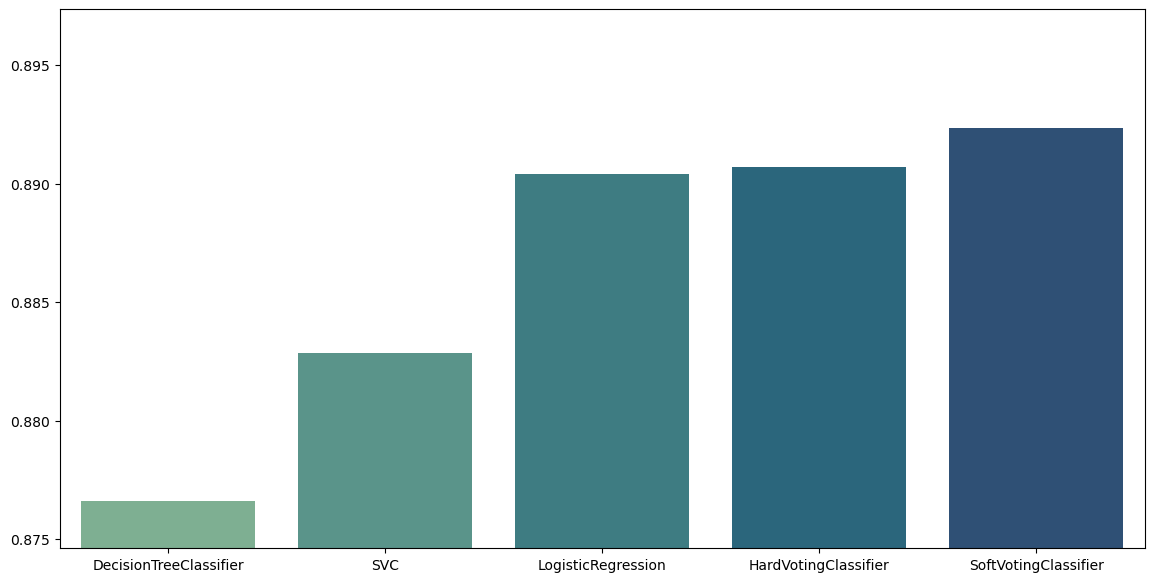

In [15]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest")
ax.set_ylim([min(list(results.values()))-0.002, max(list(results.values()))+0.005])
plt.show()

<ul>
<li>
<h3><span style="color: #ffff00;">bagging</span></h3>
<ul>
<li><span style="color: #99ccff;">using 2000 decision trees as base learners with subsampled data train</span></li>
</ul>
</li>
</ul>

In [16]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)    #max_samples:with replacement by default
                                                            # bootstrap:Whether samples are drawn with replacement. If False, sampling without replacement is performed
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8967158176943699

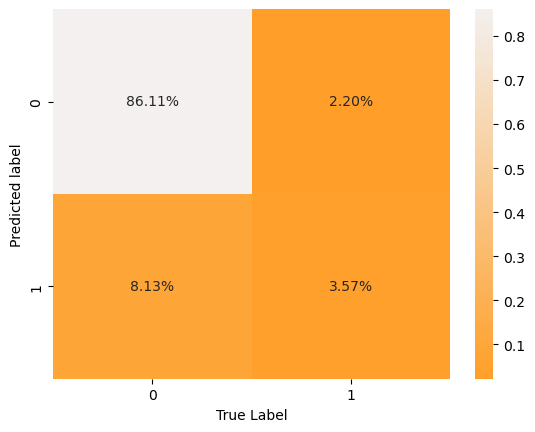

In [17]:
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(y_test, y_pred):
  clr_plt = sns.light_palette("#FF9F29", reverse=True, as_cmap=True)    # light_palette:Make a sequential palette that blends from light to color(here:FF9F29) 
                                                                        # reverse:if True, reverse the direction of the blend
                                                                        # as_cmap:If True, return a matplotlib.colors.ListedColormap
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap=clr_plt)  
  plt.ylabel('Predicted label')
  plt.xlabel('True Label')
  plt.show

show_confusion_matrix(y_test, y_pred)  

<ul>
<li>
<h2><span style="color: #ffff99;">out of bag evaluation</span></h2>
</li>
</ul>

In [18]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, bootstrap=True, n_jobs=-1, oob_score=True) #The number of jobs to run in parallel for both fit and predict 
                                                                                                                    #-1 means using all processors
                                                                                                                    # Whether to use out-of-bag samples to estimate the 
                                                                                                                    # generalization error. 
                                                                                                                    # Only available if bootstrap=True.
bag_clf.fit(x_train, y_train)
print("OOB Score: " + str(bag_clf.oob_score_))
print("Accuracy Score : "+ str(accuracy_score(y_test, bag_clf.predict(x_test))))

OOB Score: 0.9044270575418442
Accuracy Score : 0.9046246648793566


<ul>
<li>
<h3><span style="color: #ffff00;">pasting</span></h3>
<ul>
<li><span style="color: #99ccff;">same as bagging except that pasting lets no replacement</span></li>
</ul>
</li>
</ul>

In [19]:
pas_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=False, n_jobs=-1)
                                                    #n_jobs: The number of jobs to run in parallel for both fit and predict.-1 means using all processors
pas_clf.fit(x_train, y_train)
y_pred = pas_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8951742627345844

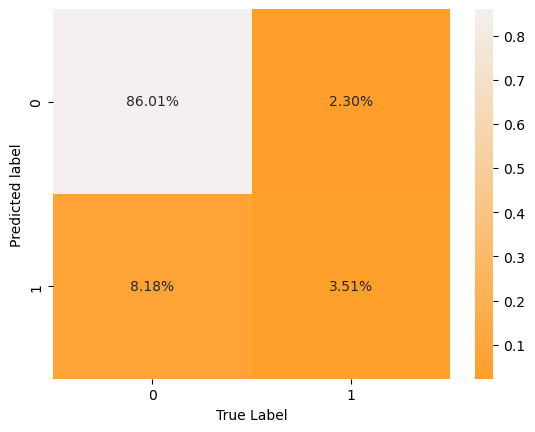

In [20]:
show_confusion_matrix(y_test, y_pred)

<ul>
<li>
<h2><span style="color: #ffff99;">Random Forest</span></h2>
<ul>
<li><span style="color: #ccffcc;"><span id="MathJax-Span-3" class="mi">𝑅</span><span id="MathJax-Span-4" class="mi">𝑎</span><span id="MathJax-Span-5" class="mi">𝑛</span><span id="MathJax-Span-6" class="mi">𝑑</span><span id="MathJax-Span-7" class="mi">𝑜</span><span id="MathJax-Span-8" class="mi">𝑚</span><span id="MathJax-Span-9" class="mtext">&nbsp;</span><span id="MathJax-Span-10" class="mi">𝐹</span><span id="MathJax-Span-11" class="mi">𝑜</span><span id="MathJax-Span-12" class="mi">𝑟</span><span id="MathJax-Span-13" class="mi">𝑒</span><span id="MathJax-Span-14" class="mi">𝑠</span><span id="MathJax-Span-15" class="mi">𝑡</span><span id="MathJax-Span-16" class="mo">=</span><span id="MathJax-Span-17" class="mi">𝐵</span><span id="MathJax-Span-18" class="mi">𝑎</span><span id="MathJax-Span-19" class="mi">𝑔</span><span id="MathJax-Span-20" class="mi">𝑔</span><span id="MathJax-Span-21" class="mi">𝑖</span><span id="MathJax-Span-22" class="mi">𝑛</span><span id="MathJax-Span-23" class="mi">𝑔</span><span id="MathJax-Span-24" class="mtext">&nbsp;</span><span id="MathJax-Span-25" class="mi">𝑊</span><span id="MathJax-Span-26" class="mi">𝑒</span><span id="MathJax-Span-27" class="mi">𝑖</span><span id="MathJax-Span-28" class="mi">𝑔</span><span id="MathJax-Span-29" class="mi">ℎ</span><span id="MathJax-Span-30" class="mi">𝑡</span><span id="MathJax-Span-31" class="mi">𝑒</span><span id="MathJax-Span-32" class="mi">𝑑</span><span id="MathJax-Span-33" class="mtext">&nbsp;</span><span id="MathJax-Span-34" class="mi">𝑇</span><span id="MathJax-Span-35" class="mi">𝑟</span><span id="MathJax-Span-36" class="mi">𝑒</span><span id="MathJax-Span-37" class="mi">𝑒</span><span id="MathJax-Span-38" class="mi">𝑠</span><span id="MathJax-Span-39" class="mo">(</span><span id="MathJax-Span-40" class="mi">𝑅</span><span id="MathJax-Span-41" class="mi">𝑒</span><span id="MathJax-Span-42" class="mi">𝑝</span><span id="MathJax-Span-43" class="mi">𝑙</span><span id="MathJax-Span-44" class="mi">𝑎</span><span id="MathJax-Span-45" class="mi">𝑐</span><span id="MathJax-Span-46" class="mi">𝑒</span><span id="MathJax-Span-47" class="mi">𝑚</span><span id="MathJax-Span-48" class="mi">𝑒</span><span id="MathJax-Span-49" class="mi">𝑛</span><span id="MathJax-Span-50" class="mi">𝑡</span><span id="MathJax-Span-51" class="mo">=</span><span id="MathJax-Span-52" class="mi">𝑇</span><span id="MathJax-Span-53" class="mi">𝑟</span><span id="MathJax-Span-54" class="mi">𝑢</span><span id="MathJax-Span-55" class="mi">𝑒</span><span id="MathJax-Span-56" class="mtext">&nbsp;</span><span id="MathJax-Span-57" class="texatom"><span id="MathJax-Span-58" class="mrow"><span id="MathJax-Span-59" class="mo">|</span></span></span><span id="MathJax-Span-60" class="mtext">&nbsp;</span><span id="MathJax-Span-61" class="mi">𝐹</span><span id="MathJax-Span-62" class="mi">𝑎</span><span id="MathJax-Span-63" class="mi">𝑙</span><span id="MathJax-Span-64" class="mi">𝑠</span><span id="MathJax-Span-65" class="mi">𝑒</span><span id="MathJax-Span-66" class="mo">)</span><span id="MathJax-Span-67" class="mo">+</span><span id="MathJax-Span-68" class="mi">𝑅</span><span id="MathJax-Span-69" class="mi">𝑎</span><span id="MathJax-Span-70" class="mi">𝑛</span><span id="MathJax-Span-71" class="mi">𝑑</span><span id="MathJax-Span-72" class="mi">𝑜</span><span id="MathJax-Span-73" class="mi">𝑚</span><span id="MathJax-Span-74" class="mtext">&nbsp;</span><span id="MathJax-Span-75" class="mi">𝐹</span><span id="MathJax-Span-76" class="mi">𝑒</span><span id="MathJax-Span-77" class="mi">𝑎</span><span id="MathJax-Span-78" class="mi">𝑡</span><span id="MathJax-Span-79" class="mi">𝑢</span><span id="MathJax-Span-80" class="mi">𝑟</span><span id="MathJax-Span-81" class="mi">𝑒</span><span id="MathJax-Span-82" class="mtext">&nbsp;</span><span id="MathJax-Span-83" class="mi">𝑠</span><span id="MathJax-Span-84" class="mi">𝑢</span><span id="MathJax-Span-85" class="mi">𝑏</span><span id="MathJax-Span-86" class="mi">𝑠</span><span id="MathJax-Span-87" class="mi">𝑒</span><span id="MathJax-Span-88" class="mi">𝑡</span><span id="MathJax-Span-89" class="mi">𝑠</span></span></li>
</ul>
</li>
</ul>

In [21]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.8955093833780161

<ul>
<li>
<h3><span style="color: #ffff00;">Adaboost</span></h3>
<ul>
<li><span style="color: #99ccff;"><strong>estimator:</strong>The base estimator from which the boosted ensemble is built</span></li>
<li><span style="color: #99ccff;"><strong>n_estimators:</strong>The maximum number of estimators at which boosting is terminated</span></li>
<li><span style="color: #99ccff;"><strong>learning_rate:</strong>Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier</span></li>
</ul>
</li>
</ul>

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8948391420911528

<ul>
<li>
<h2><span style="color: #ccffcc;">Gradient Boosting</span></h2>
<ul>
<li><span style="color: #ffcc99;">similar to Adaboost</span></li>
</ul>
</li>
</ul>

In [23]:
tree_cl1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl1.fit(x_train, y_train)

y2 = y_train - tree_cl1.predict(x_train)
tree_cl2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl2.fit(x_train, y2)

y3 = y2 - tree_cl2.predict(x_train)
tree_cl3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl3.fit(x_train, y3)

y_pred = sum(tree.predict(x_test) for tree in (tree_cl1, tree_cl2, tree_cl3))
accuracy_score(y_test, y_pred)

0.8880026809651475

<ul>
<li>
<h2><span style="color: #ccffcc;">Gradient Boosting</span></h2>
<ul>
<li><span style="color: #ffcc99;">using scikit learn</span></li>
</ul>
</li>
</ul>

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=5, random_state=42, learning_rate=1.0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8939678284182305

<ul>
<li>
<h2><span style="color: #ccffcc;">early stopping</span></h2>
</li>
</ul>

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
result={}
for count_of_estimators in range(1, 70):
  gbc = GradientBoostingClassifier(max_depth=2, n_estimators=count_of_estimators, random_state=42, learning_rate=1.0)
  gbc.fit(x_train, y_train)
  y_pred = gbc.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  result[count_of_estimators]=val_error
result

{1: 0.14028150134048256,
 2: 0.11199731903485255,
 3: 0.10408847184986596,
 4: 0.10583109919571046,
 5: 0.10603217158176943,
 6: 0.10274798927613941,
 7: 0.10221179624664879,
 8: 0.10040214477211797,
 9: 0.09919571045576407,
 10: 0.09892761394101876,
 11: 0.1002680965147453,
 12: 0.10100536193029491,
 13: 0.10020107238605898,
 14: 0.1002680965147453,
 15: 0.09993297587131367,
 16: 0.09979892761394102,
 17: 0.09825737265415549,
 18: 0.1002680965147453,
 19: 0.09953083109919571,
 20: 0.09953083109919571,
 21: 0.09792225201072385,
 22: 0.09892761394101876,
 23: 0.0985254691689008,
 24: 0.0985254691689008,
 25: 0.0985254691689008,
 26: 0.09906166219839142,
 27: 0.09872654155495979,
 28: 0.09886058981233244,
 29: 0.09886058981233244,
 30: 0.09872654155495979,
 31: 0.09819034852546916,
 32: 0.09839142091152815,
 33: 0.09886058981233244,
 34: 0.09859249329758712,
 35: 0.09765415549597856,
 36: 0.09805630026809652,
 37: 0.09845844504021448,
 38: 0.09839142091152815,
 39: 0.09819034852546916,
 

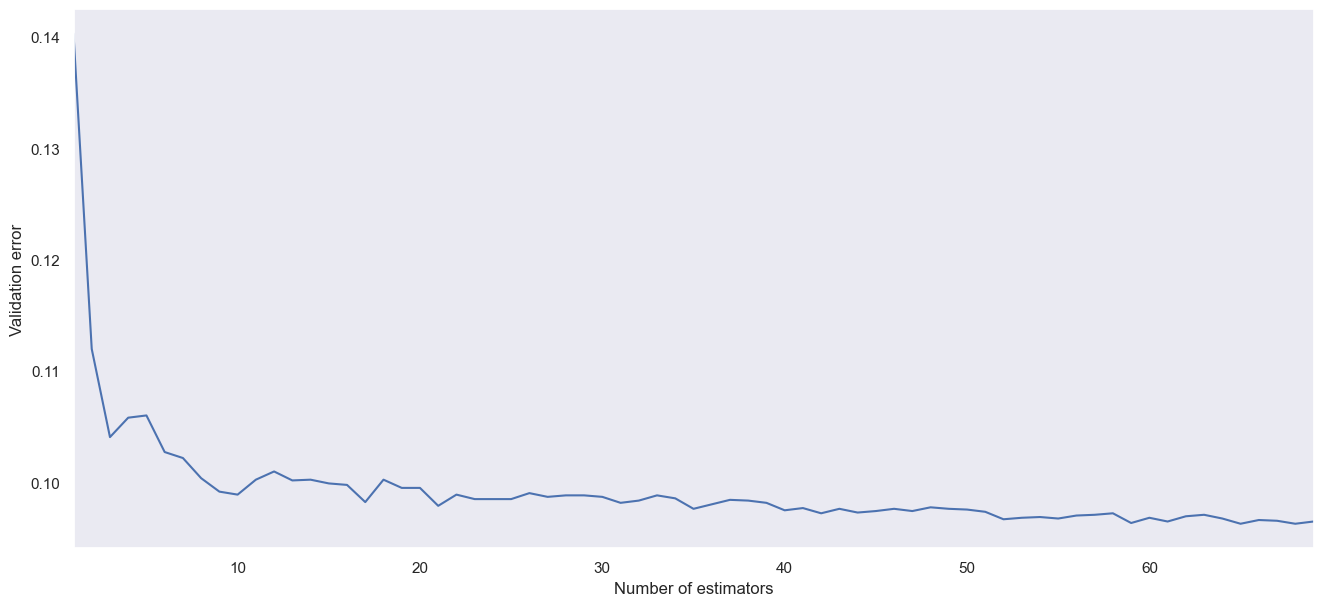

In [26]:

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

<ul>
<li>
<h2><span style="color: #ccffcc;">stacking</span></h2>
</li>
</ul>

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('svc', svm_clf), ('knn', knn_clf)], final_estimator=LogisticRegression())
stacking_clf.fit(x_train, y_train)
y_pred = stacking_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8998659517426274